
# Project: Investigate a Dataset - [TMDB  Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
the project about movie dataset.This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.the columns name is
[**id,
 imdb_id,
 popularity,
 budget,
 revenue,
 original_title,
 cast,
 homepage,
 director,
 tagline,
 keywords,
 overview,
 runtime,
 genres,
 production_companies,
 release_date,
 vote_count,
 vote_average,
 release_year,
 budget_adj,
revenue_adj**]
### Question(s) for Analysis
**1)Which genres generate the highest revenue?**


**2)Is there a relationship between movie budget and revenue?**



**3)is that revenue is affected by popularity?**


In [1]:
# we will use the pandas library and numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling
### General Properties


In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df_movie=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')



In [3]:
# to see the number of rows and columns
df_movie.shape

(10866, 21)

In [4]:
df_movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

as you see i use **info()** to see what name of columns and what the datatype for each column and i think there no need to fix the datatype for  column because all the datatype is 
realistic.

In [5]:
# Check for missing values
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Check for duplicate rows
df_movie.duplicated().any()

True

In [7]:
# Count the number of duplicate rows
sum(df_movie.duplicated())

1


### Data Cleaning

 

know in Data Cleaning we know what missing value in each colunm and the duplicate value to clean it. we will clean this two colunms **(genres,imdb_id)**  only why? because we deal with this colunm that mean is important to have value for it and i choose this colunms first **genres** beacuse one of Question depend on it. the other colunm **imdb_id** i think in my opinion is very imporatent to clean it.and i think you can delete it if you want beacuse we have the **id** it is the primary key there other colunms contain null value we will not modfit it becasue we will not use it in my Question. 

In [8]:
# delete null values 
df_movie.dropna(subset=['genres','imdb_id'],inplace=True)
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10835 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10835 non-null  float64
 3   budget                10835 non-null  int64  
 4   revenue               10835 non-null  int64  
 5   original_title        10835 non-null  object 
 6   cast                  10760 non-null  object 
 7   homepage              2929 non-null   object 
 8   director              10796 non-null  object 
 9   tagline               8034 non-null   object 
 10  keywords              9364 non-null   object 
 11  overview              10833 non-null  object 
 12  runtime               10835 non-null  int64  
 13  genres                10835 non-null  object 
 14  production_companies  9823 non-null   object 
 15  release_date       

In [9]:
#delete duplicates
df_movie.drop_duplicates(inplace=True)
df_movie.info()
df_movie.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10834 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10834 non-null  float64
 3   budget                10834 non-null  int64  
 4   revenue               10834 non-null  int64  
 5   original_title        10834 non-null  object 
 6   cast                  10759 non-null  object 
 7   homepage              2929 non-null   object 
 8   director              10795 non-null  object 
 9   tagline               8033 non-null   object 
 10  keywords              9363 non-null   object 
 11  overview              10832 non-null  object 
 12  runtime               10834 non-null  int64  
 13  genres                10834 non-null  object 
 14  production_companies  9822 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Which genres generate the highest revenue?)

In [10]:
#We need to handle the genres column, which contains multiple genres separated by a |. We'll split the genres into separate rows like we do in fuel economy.
df=df_movie.copy()
# Split the genre combinations
df['genres'] = df['genres'].str.split('|')

# Explode the genre column
df = df.explode('genres')

# Get all the unique genre values
unique_genres = df['genres'].unique()

print(unique_genres)


['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


In [11]:
df.groupby('genres')['revenue'].mean(numeric_only=True).sort_values(ascending=False)

genres
Adventure          1.132919e+08
Fantasy            9.663013e+07
Animation          7.547201e+07
Action             7.294773e+07
Family             7.249207e+07
Science Fiction    7.042708e+07
War                4.760518e+07
Crime              4.236866e+07
Thriller           4.172842e+07
Mystery            4.021757e+07
Comedy             3.753614e+07
Romance            3.569197e+07
History            3.201179e+07
Drama              2.924454e+07
Music              2.864197e+07
Western            2.856871e+07
Horror             1.682281e+07
Documentary        2.045040e+06
Foreign            1.520460e+06
TV Movie           2.514970e+05
Name: revenue, dtype: float64

as you see the highiest genre revenue is the **the Adventure**
and the lowest is **the TV Movie**
that mean if somebody want to make movie it should contain **the Adventure** genre to get highiest revenue. this fact not alawys true this only for statics languge not work in real life sometimes 

### Research Question 2  (Is there a relationship between movie budget and revenue?)

In [12]:
#functions for scatter visualization
def plot_scatter(df, x_column, y_column, title, xlabel, ylabel):
    """
    Plot a scatter plot from two DataFrame columns, with a title and axis labels.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame containing the data.
    x_column (str): The column to use for the x-axis.
    y_column (str): The column to use for the y-axis.
    title (str): The title of the scatter plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.

    Returns:
    None
    """
    plt.scatter(df[x_column], df[y_column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [13]:
# functions for Connected Scatterplot visualization
def connected_scatterplot(df, x_column, y_column,title):
    df_sorted = df.sort_values(x_column)
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[x_column], df_sorted[y_column], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

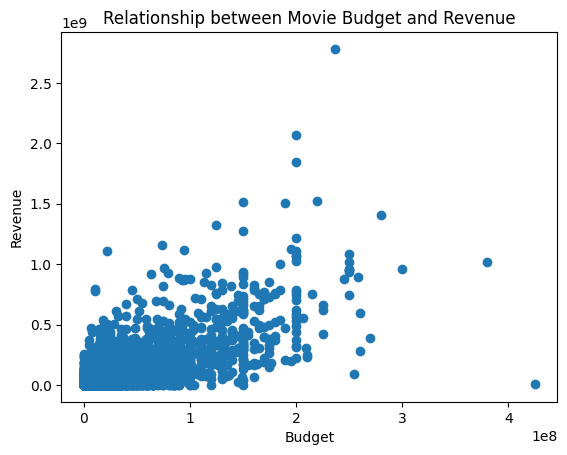

In [14]:
# call functions
plot_scatter(df_movie, 'budget', 'revenue', 'Relationship between Movie Budget and Revenue', 'Budget', 'Revenue')

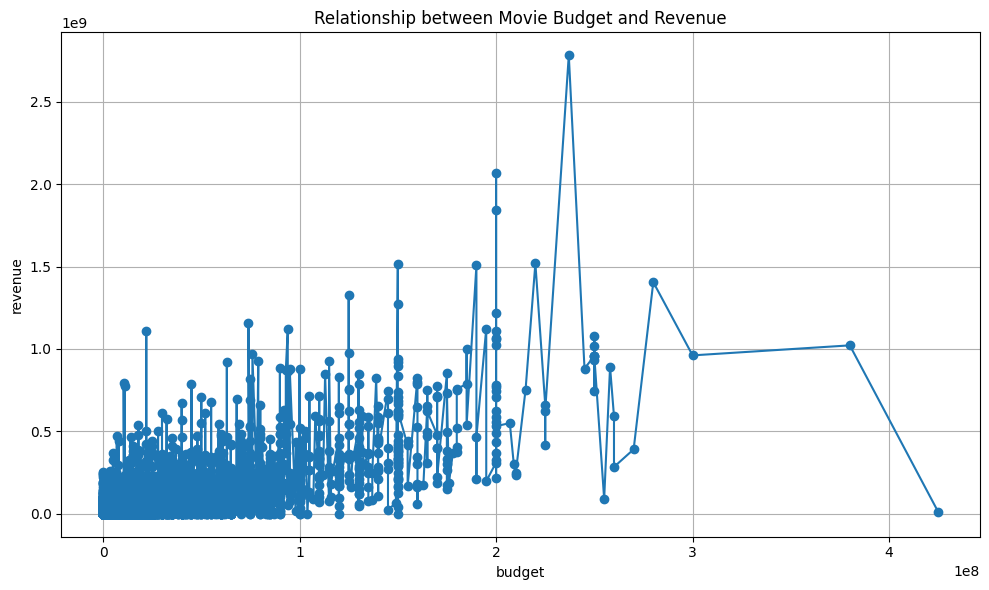

In [15]:
# call functions
connected_scatterplot(df_movie, 'budget', 'revenue','Relationship between Movie Budget and Revenue')


In [16]:
print(df_movie['budget'].corr(df_movie['revenue']))

0.7348243132510552


we use scatter polt to see the relationship between movie budget and revenue and give us Positive correlation that mean if budget increase  revenue will also increase.and you check by using this method **corr()** is between 1 to -1 if it positive that mean Positive correlation if negitve negitve correlation

### Research Question 3  (is that revenue is affected by popularity?)

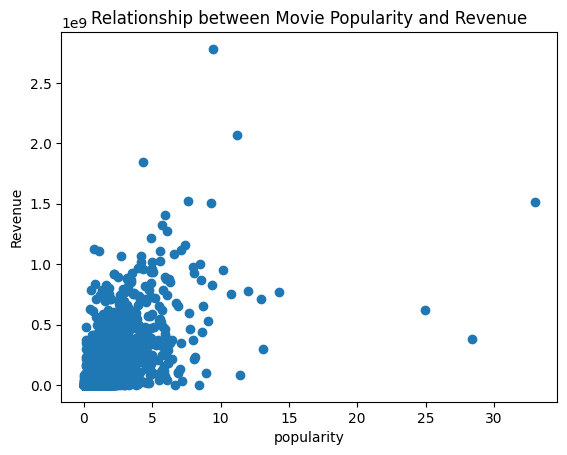

In [17]:
# call functions
plot_scatter(df_movie, 'popularity', 'revenue', 'Relationship between Movie Popularity and Revenue', 'popularity', 'Revenue')

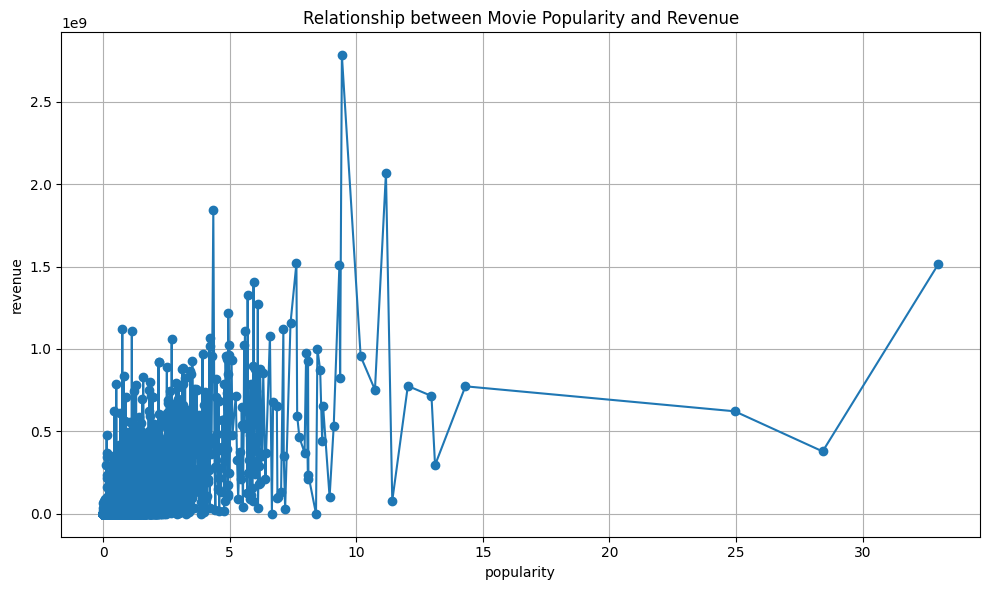

In [18]:
# call functions
connected_scatterplot(df_movie, 'popularity', 'revenue','Relationship between Movie Popularity and Revenue')


In [19]:
print(df_movie['popularity'].corr(df_movie['revenue']))

0.6632459359387756


we use scatter polt to see the relationship between movie populartiy and revenue and give us Positive correlation that mean if populartiyincrease  revenue will also increase.and you check by using this method **corr()** is between 1 to -1 if it positive that mean Positive correlation if negitve negitve correlation

<a id='conclusions'></a>
## Conclusions
**1)Genres and Revenue: Adventure movies generate the highest average revenue, followed by Fantasy and Animation genres. TV Movies generate the lowest revenue on average.**

**2)Budget and Revenue: There is a positive correlation (0.73) between budget and revenue, indicating that higher budget movies tend to generate higher revenue.**

**3)Popularity and Revenue: There is also a positive correlation (0.66) between popularity and revenue, suggesting that more popular movies tend to generate higher revenue.**
## Limitation
**Missing Data
The dataset contains missing values in several columns, such as cast,production_companies and others. 
and this could affect the accuracy and completeness of the analysis. for example the  production_companies column has 1,030 missing values, which is approximately 10.3% of the dataset.and  if you want to add production_companies in the Questions you will encounter some problem.**

## Submitting your Project 

In [110]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 570579 bytes to Investigate_a_Dataset.html
